In [7]:

# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# LOADING DIABETES DATASET

In [9]:
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [10]:
# CLEANING THE  DIABETES DATASET

In [11]:
def clean_dataset(df):
    df = df.dropna()  # Remove rows with missing values
    if df.isnull().sum().sum() > 0:
        df = df.fillna(df.mean())  # Impute remaining missing values if any
    return df
diabetes_df = clean_dataset(diabetes_df)
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [12]:
# PERFORMING EDA ON DIABETES DATASET

In [13]:
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe())
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

perform_eda(diabetes_df, "Diabetes")


EDA for Diabetes dataset
----------------------------------------
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%    

EDA for Diabetes dataset
----------------------------------------
Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%    

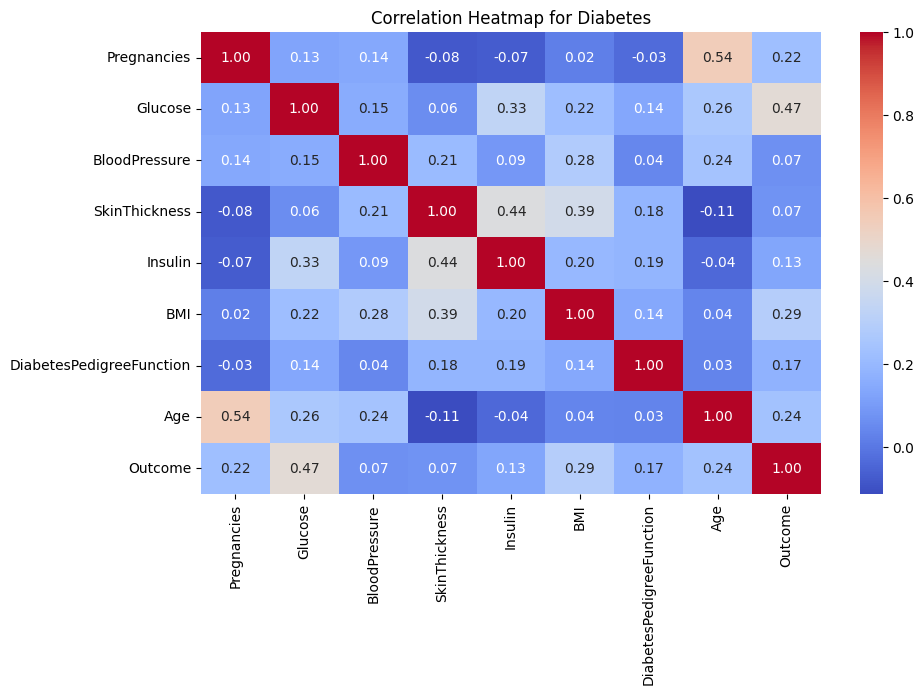

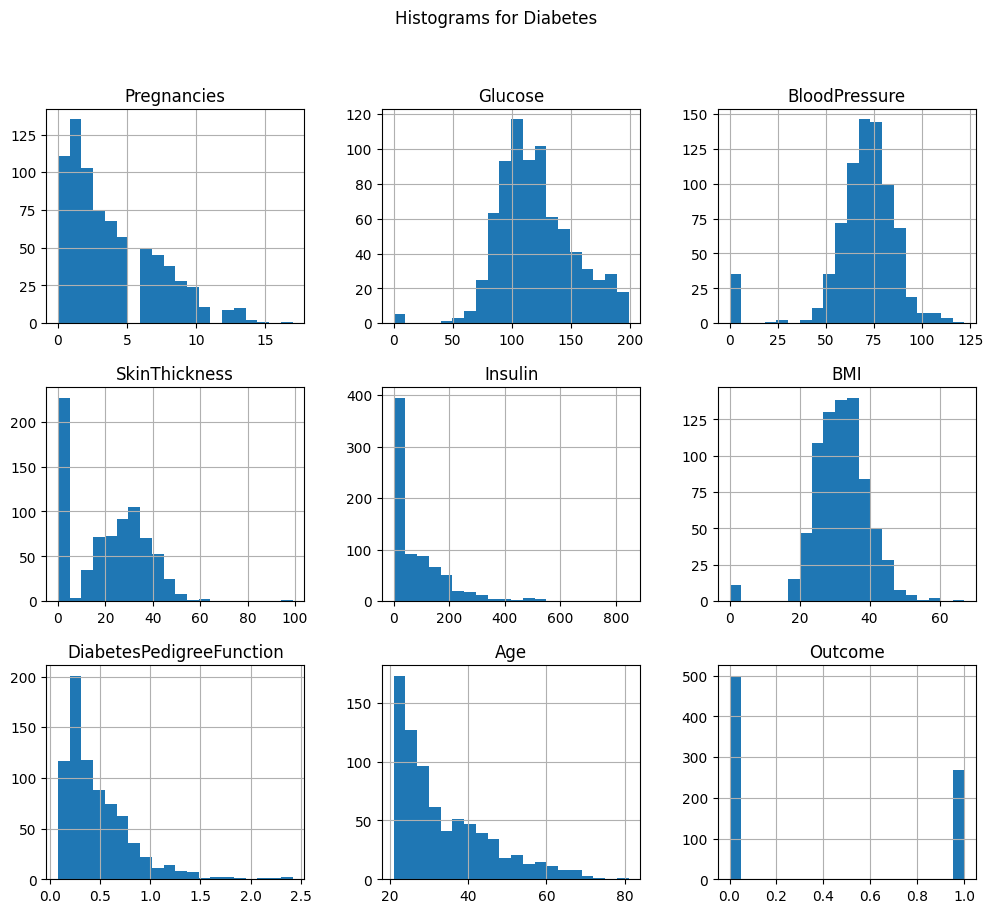

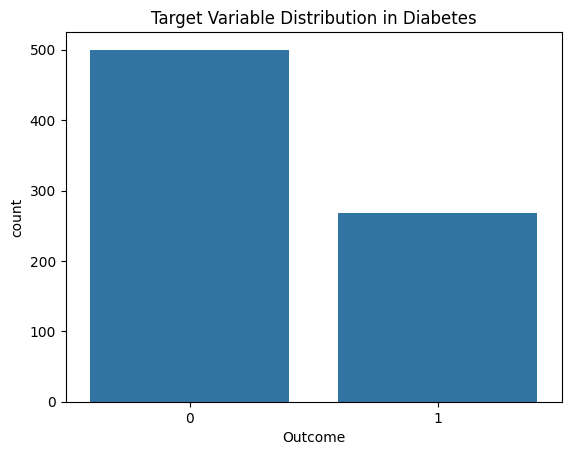

In [14]:
# PERFORM EDA
def perform_eda(df, dataset_name):
    print(f"EDA for {dataset_name} dataset")
    print("-" * 40)
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Missing Values:\n", df.isnull().sum())
    print("Summary Statistics:\n", df.describe(include='all'))
    print("Class Distribution (if classification target exists):")
    if 'Outcome' in df.columns:
        print(df['Outcome'].value_counts())
    elif 'target' in df.columns:
        print(df['target'].value_counts())
    elif 'status' in df.columns:
        print(df['status'].value_counts())
    print("\n")

    # Generate graphs
    numeric_columns = df.select_dtypes(include=['float64', 'int64'])
    if not numeric_columns.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
        plt.title(f"Correlation Heatmap for {dataset_name}")
        plt.show()

        numeric_columns.hist(figsize=(12, 10), bins=20)
        plt.suptitle(f"Histograms for {dataset_name}")
        plt.show()

    if 'Outcome' in df.columns or 'target' in df.columns or 'status' in df.columns:
        target_column = 'Outcome' if 'Outcome' in df.columns else 'target' if 'target' in df.columns else 'status'
        sns.countplot(x=target_column, data=df)
        plt.title(f"Target Variable Distribution in {dataset_name}")
        plt.show()

perform_eda(diabetes_df, "Diabetes")

In [15]:
# SPLITTING,TRAINING,VALIDATION AND TESTING FOR THE THREE DATASETS

In [16]:
# Split datasets into training, validation, and test sets

def split_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [18]:
 #Assuming the target columns are known
from sklearn.model_selection import train_test_split # Import train_test_split if you haven't already

diabetes_splits = split_data(diabetes_df, 'Outcome')



In [19]:
# Print split shapes
for name, splits in zip(["Diabetes"],
                        [diabetes_splits]):
    X_train, X_val, X_test, y_train, y_val, y_test = splits
    print(f"{name} dataset:")
    print("Train set:", X_train.shape, y_train.shape)
    print("Validation set:", X_val.shape, y_val.shape)
    print("Test set:", X_test.shape, y_test.shape)
    print()

Diabetes dataset:
Train set: (537, 8) (537,)
Validation set: (115, 8) (115,)
Test set: (116, 8) (116,)



In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
#TRAINING AN DIABETIES DATASET

In [22]:

# Load the diabetes dataset
data = pd.read_csv("/content/diabetes.csv")  # Replace with the path to your diabetes dataset

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Outcome'])  # 'Outcome' column is the target (0: No Diabetes, 1: Diabetes)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0

In [23]:
# finding that whether a person has a diabetis or not

In [24]:
# Load the dataset

data = pd.read_csv("diabetes.csv")  # Replace with the path to your diabetes dataset

# Display dataset information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
if data.isnull().sum().any():
    print("\nMissing values detected. Filling missing values with median...")
    data = data.fillna(data.median())

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Outcome'])  # 'Outcome' is the target column (0: No Diabetes, 1: Diabetes)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Test the model with user-provided data (optional)
def predict_diabetes(features):
    """
    Predict if a person has diabetes based on their features.
    Features must be a list or array of values in the same order as the dataset's feature columns.
    """
    features_df = pd.DataFrame([features], columns=X.columns)
    prediction = model.predict(features_df)[0]
    return "Diabetes" if prediction == 1 else "No Diabetes"

# Example: Predict with sample data
sample_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]  # Example input data
result = predict_diabetes(sample_data)
print(f"\nPrediction for sample data: {result}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

First 5 Rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0